# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os 
import csv
import dataframe_image as dfi

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

response_json = []
response_info_json = []

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [3]:
#print cities list
#cities

In [4]:
#make the array/list into a simple df
cities_df = pd.DataFrame(cities,columns=['City'])
cities_df

,City
0,komsomolskiy
1,bredasdorp
2,merauke
3,shingu
4,mataura
...,...
601,quatre cocos
602,bubaque
603,taiyuan
604,kodinsk


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#test if my URL is working on a single city
#city = 'Las Vegas'

#base_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
base_url = f"http://api.openweathermap.org/data/2.5/weather?q={cities}&appid={weather_api_key}"
#base_url

In [6]:
# Add columns for lat, lng, airport name, airport address, airport rating
# Note that we used "" to specify initial entry.
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,komsomolskiy,,,,,,,,
1,bredasdorp,,,,,,,,
2,merauke,,,,,,,,
3,shingu,,,,,,,,
4,mataura,,,,,,,,


In [7]:
#Used to test location of data and duild dataframe
#city = 'Las Vegas'

#base_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
#response_info_json[0]#['dt']#['temp_max']#['coord']#['lon']

In [8]:
#request data from OpenWeather API website

#running for only 10 cities for pilot testing. --below code for full testing
#for x in range(100): #use during testing for speed
for x in range(len(cities)):

    print(f"Making request number: {x} for ID: {cities[x]}")

    # Get one of the posts
    response_info = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={cities[x]}&appid={weather_api_key}")

    # Save post's JSON
    response_info_json.append(response_info.json())
    try:
        cities_df.loc[x, "Lat"] = response_info_json[x]['coord']['lat']
        cities_df.loc[x, "Lng"] = response_info_json[x]['coord']['lon']
        cities_df.loc[x, "Max Temp"] = response_info_json[x]['main']['temp_max']
        cities_df.loc[x, "Humidity"] = response_info_json[x]['main']['humidity']
        cities_df.loc[x, "Cloudiness"] = response_info_json[x]['clouds']['all']
        cities_df.loc[x, "Wind Speed"] = response_info_json[x]['wind']['speed']
        cities_df.loc[x, "Country"] = response_info_json[x]['sys']['country']
        cities_df.loc[x, "Date"] = response_info_json[x]['dt']
    except KeyError:
        print("move on to next")
        
cities_df.head(10)    

Making request number: 0 for ID: komsomolskiy
Making request number: 1 for ID: bredasdorp
Making request number: 2 for ID: merauke
Making request number: 3 for ID: shingu
Making request number: 4 for ID: mataura
Making request number: 5 for ID: mys shmidta
move on to next
Making request number: 6 for ID: guerrero negro
Making request number: 7 for ID: new kensington
Making request number: 8 for ID: barawe
move on to next
Making request number: 9 for ID: natal
Making request number: 10 for ID: batagay
Making request number: 11 for ID: charleston
Making request number: 12 for ID: yellowknife
Making request number: 13 for ID: ribeira grande
Making request number: 14 for ID: atuona
Making request number: 15 for ID: tiksi
Making request number: 16 for ID: mahebourg
Making request number: 17 for ID: new norfolk
Making request number: 18 for ID: punta arenas
Making request number: 19 for ID: seoul
Making request number: 20 for ID: atar
Making request number: 21 for ID: port victoria
Making re

Making request number: 182 for ID: rincon
Making request number: 183 for ID: attawapiskat
move on to next
Making request number: 184 for ID: suluq
Making request number: 185 for ID: methven
Making request number: 186 for ID: fukue
Making request number: 187 for ID: barabai
Making request number: 188 for ID: honiara
Making request number: 189 for ID: lorengau
Making request number: 190 for ID: rajo khanani
Making request number: 191 for ID: bowen
Making request number: 192 for ID: port lincoln
Making request number: 193 for ID: sugod
Making request number: 194 for ID: tiarei
Making request number: 195 for ID: northam
Making request number: 196 for ID: saskylakh
Making request number: 197 for ID: henties bay
Making request number: 198 for ID: esperance
Making request number: 199 for ID: buta
Making request number: 200 for ID: belmonte
Making request number: 201 for ID: bathsheba
Making request number: 202 for ID: kenai
Making request number: 203 for ID: chernukha
Making request number: 2

Making request number: 362 for ID: mao
Making request number: 363 for ID: nieuw amsterdam
Making request number: 364 for ID: leningradskiy
Making request number: 365 for ID: trapani
Making request number: 366 for ID: port-gentil
Making request number: 367 for ID: nantucket
Making request number: 368 for ID: touros
Making request number: 369 for ID: agua dulce
Making request number: 370 for ID: ribeira brava
Making request number: 371 for ID: christchurch
Making request number: 372 for ID: boyabat
Making request number: 373 for ID: altamira
Making request number: 374 for ID: faanui
Making request number: 375 for ID: talakan
Making request number: 376 for ID: springdale
Making request number: 377 for ID: olinda
Making request number: 378 for ID: lavrentiya
Making request number: 379 for ID: ilulissat
Making request number: 380 for ID: rudbar
Making request number: 381 for ID: puntarenas
Making request number: 382 for ID: chapais
Making request number: 383 for ID: dzialdowo
Making request

Making request number: 544 for ID: illela
Making request number: 545 for ID: belem de sao francisco
Making request number: 546 for ID: avenal
Making request number: 547 for ID: ramsgate
Making request number: 548 for ID: dudinka
Making request number: 549 for ID: tselinnoye
Making request number: 550 for ID: sorrento
Making request number: 551 for ID: akcakoca
Making request number: 552 for ID: mecca
Making request number: 553 for ID: talas
Making request number: 554 for ID: savinka
Making request number: 555 for ID: tessalit
Making request number: 556 for ID: cuauhtemoc
Making request number: 557 for ID: ugoofaaru
Making request number: 558 for ID: soyo
Making request number: 559 for ID: tondano
Making request number: 560 for ID: tenenkou
Making request number: 561 for ID: valdivia
Making request number: 562 for ID: cairo
Making request number: 563 for ID: amos
Making request number: 564 for ID: naftah
move on to next
Making request number: 565 for ID: santa isabel do rio negro
Making

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,komsomolskiy,40.4272,71.7189,285.15,54,30,3.09,UZ,1619219342
1,bredasdorp,-34.5322,20.0403,283.15,93,92,2.06,ZA,1619219642
2,merauke,-8.4667,140.333,299.86,84,51,2.91,ID,1619219642
3,shingu,33.7333,135.983,289.15,72,75,2.06,JP,1619219443
4,mataura,-46.1927,168.864,283.71,92,72,0.45,NZ,1619219390
5,mys shmidta,,,,,,,,
6,guerrero negro,27.9769,-114.061,290.95,62,10,9.88,MX,1619219643
7,new kensington,40.5698,-79.7648,287.59,40,80,1.34,US,1619219643
8,barawe,,,,,,,,
9,natal,-5.795,-35.2094,300.15,89,20,3.09,BR,1619219644


In [9]:
#type test- need numerical/float
cities_df.dtypes


City          object
Lat           object
Lng           object
Max Temp      object
Humidity      object
Cloudiness    object
Wind Speed    object
Country       object
Date          object
dtype: object

In [10]:
#change necessary type to numeric/float
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"],errors='coerce')
cities_df["Lng"] = pd.to_numeric(cities_df["Lng"],errors='coerce')
cities_df["Max Temp"] = pd.to_numeric(cities_df["Max Temp"],errors='coerce')
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"],errors='coerce')
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"],errors='coerce')
cities_df["Wind Speed"] = pd.to_numeric(cities_df["Wind Speed"],errors='coerce')
cities_df["Date"] = pd.to_numeric(cities_df["Date"],errors='coerce')
cities_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object

In [11]:
#cities_agg_df=cities_df.agg(['count','mean', 'std', 'min', 'max'])
#cities_agg_df = cities_df.groupby('Sort').agg({"Lat":['count',np.mean, np.std, 'min', 'max']})
#tumor_vol_df = last_time_interval_mice_df[['Tumor Volume (mm3)','Drug Regimen']].copy()
#cities_agg_df
#cleaned_agg_df = cities_agg_df[['Lat','Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']].copy()
#cleaned_agg_df

In [12]:
#columns.describe(percentiles=[0.5, 0.95])
#cleaned_for_agg_df = cities_df[['Lat','Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']].copy()
#cleaned_for_agg_df.columns.agg('describe')[['25%', '50%', '75%', 'count']]
#cleaned_agg_df.columns.describe(percentiles=[0.5, 0.95])
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,19.930778,20.337274,288.658315,69.505435,51.418478,3.346667,1.619220e+09
std,33.492638,91.089014,10.884770,23.753039,37.576741,2.347386,1.154232e+02
min,-54.800000,-179.166700,257.260000,6.000000,0.000000,0.240000,1.619219e+09
25%,-7.964725,-58.822525,280.262500,58.000000,14.000000,1.585000,1.619220e+09
50%,23.762100,25.588550,290.150000,77.000000,53.000000,2.765000,1.619220e+09
75%,48.595525,100.586550,298.175000,87.000000,90.000000,4.290000,1.619220e+09
max,78.218600,179.316700,308.150000,100.000000,100.000000,15.480000,1.619220e+09


In [13]:
#DF with humidity >100
humidity_df = pd.DataFrame(cities_df[cities_df['Humidity'] > 100])
humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [14]:
#DF with humidity < 101
clean_city_df = pd.DataFrame(cities_df[cities_df['Humidity'] < 101])
clean_city_df.dropna(inplace=False)
clean_city_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,komsomolskiy,40.4272,71.7189,285.15,54.0,30.0,3.09,UZ,1.619219e+09
1,bredasdorp,-34.5322,20.0403,283.15,93.0,92.0,2.06,ZA,1.619220e+09
2,merauke,-8.4667,140.3333,299.86,84.0,51.0,2.91,ID,1.619220e+09
3,shingu,33.7333,135.9833,289.15,72.0,75.0,2.06,JP,1.619219e+09
4,mataura,-46.1927,168.8643,283.71,92.0,72.0,0.45,NZ,1.619219e+09
...,...,...,...,...,...,...,...,...,...
601,quatre cocos,-20.2078,57.7625,299.15,78.0,40.0,4.12,MU,1.619220e+09
602,bubaque,11.2833,-15.8333,298.79,71.0,2.0,7.63,GW,1.619220e+09
603,taiyuan,37.8694,112.5603,285.15,66.0,40.0,3.00,CN,1.619220e+09
604,kodinsk,58.6881,99.1844,272.32,89.0,80.0,1.08,RU,1.619220e+09


In [15]:
clean_city_df["Temp F"] = (clean_city_df["Max Temp"] - 273.15) * (9/5) +32
clean_city_df




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Temp F
0,komsomolskiy,40.4272,71.7189,285.15,54.0,30.0,3.09,UZ,1.619219e+09,53.600
1,bredasdorp,-34.5322,20.0403,283.15,93.0,92.0,2.06,ZA,1.619220e+09,50.000
2,merauke,-8.4667,140.3333,299.86,84.0,51.0,2.91,ID,1.619220e+09,80.078
3,shingu,33.7333,135.9833,289.15,72.0,75.0,2.06,JP,1.619219e+09,60.800
4,mataura,-46.1927,168.8643,283.71,92.0,72.0,0.45,NZ,1.619219e+09,51.008
...,...,...,...,...,...,...,...,...,...,...
601,quatre cocos,-20.2078,57.7625,299.15,78.0,40.0,4.12,MU,1.619220e+09,78.800
602,bubaque,11.2833,-15.8333,298.79,71.0,2.0,7.63,GW,1.619220e+09,78.152
603,taiyuan,37.8694,112.5603,285.15,66.0,40.0,3.00,CN,1.619220e+09,53.600
604,kodinsk,58.6881,99.1844,272.32,89.0,80.0,1.08,RU,1.619220e+09,30.506


In [16]:
output_path = os.path.join("..", "output_data", "clean_city.csv")
clean_city_df.to_csv(output_path, encoding="utf-8", index=False)

#dfi.export(clean_city_df, '../output_data/clean_city_df.png') #Can only create image for SMALL files otherwise the image is to big

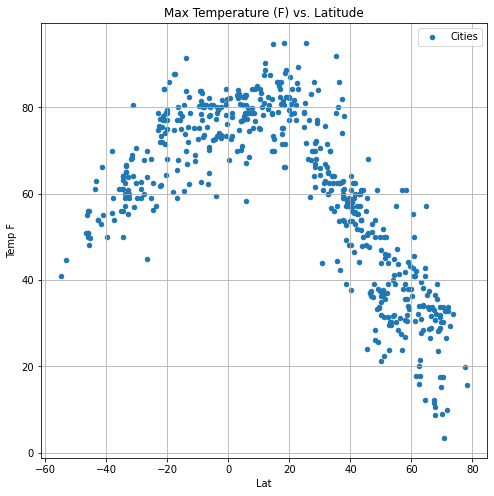

In [67]:
# Generate a scatter plot of temp (F) vs Lat

clean_city_df.plot(kind="scatter", y="Temp F", x="Lat", grid=True, figsize=(8,8),
              title="Max Temperature (F) vs. Latitude", label = 'Cities')
plt.legend()
plt.savefig('../output_data/AllTempFig.png')
plt.show()


The plot above shows cities maximum temperatures to latitiudes are higher as they approch 0 latitude.  This data is accurate as 0 latitude would refer to the equator which is typically the warmest.

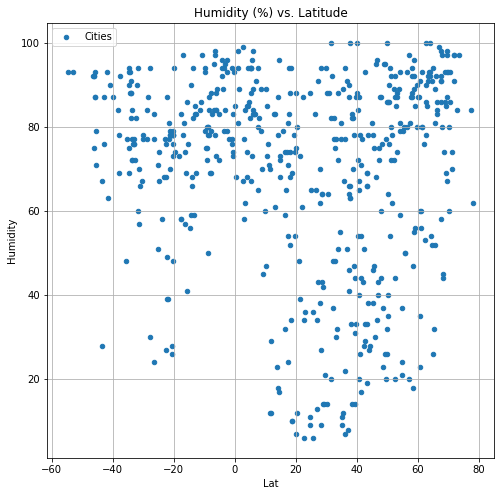

In [68]:
# Generate a scatter plot of humid vs Lat
clean_city_df.plot(kind="scatter", y="Humidity", x="Lat", grid=True, figsize=(8,8),
              title="Humidity (%) vs. Latitude", label = 'Cities')
plt.legend()
plt.savefig('../output_data/AllHumidityFig.png')
plt.show()


The plot above shows cities humidity plotted against latitude.  This plot doesn't show a definitive pattern, it is more random.  There may be a slight lean towards the Northern Hemisphere, humidity may be sightly more in the north.  More data would be needed to accuratly analyze humidity, consideration of proximity to water and altitude may need to be taken.

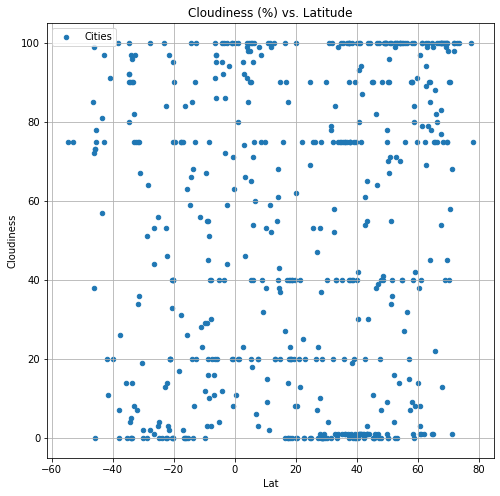

In [69]:
# Generate a scatter plot of cloud vs Lat
clean_city_df.plot(kind="scatter", y="Cloudiness", x="Lat", grid=True, figsize=(8,8),
              title="Cloudiness (%) vs. Latitude", label = 'Cities')
plt.legend()
plt.savefig('../output_data/AllCloudFig.png')
plt.show()

This plot shows cities cloudiness compared to latitude.  This plot doesn't show a definitive pattern, it is more random.  More data would be needed to accuratly analyze humidity, consideration of proximity to water and altitude may need to be taken.

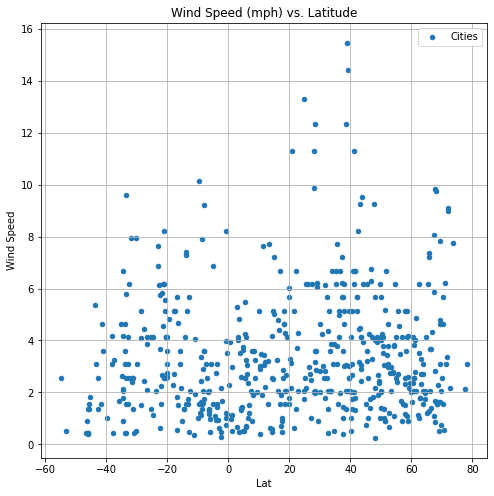

In [70]:
# Generate a scatter plot of wind vs Lat
clean_city_df.plot(kind="scatter", y="Wind Speed", x="Lat", grid=True, figsize=(8,8),
              title="Wind Speed (mph) vs. Latitude", label = 'Cities')
plt.legend()
plt.savefig('../output_data/AllWindFig.png')
plt.show()

This plot shows cities wind speed to latitude.  This also seems random, slightly higher in the northern hemisphere. But this may just be due to the random sample that was choosen.  More data would need to be analyzed to make an accurate relationship.

In [21]:
#DF Northern Hemisphere
northern_df = pd.DataFrame(clean_city_df[cities_df['Lat'] >= 0])#|cities_df[cities_df['Lat'] ==0 ])
northern_df

<ipython-input-21-35182b84953b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  northern_df = pd.DataFrame(clean_city_df[cities_df['Lat'] >= 0])#|cities_df[cities_df['Lat'] ==0 ])


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Temp F
0,komsomolskiy,40.4272,71.7189,285.15,54.0,30.0,3.09,UZ,1.619219e+09,53.600
3,shingu,33.7333,135.9833,289.15,72.0,75.0,2.06,JP,1.619219e+09,60.800
6,guerrero negro,27.9769,-114.0611,290.95,62.0,10.0,9.88,MX,1.619220e+09,64.040
7,new kensington,40.5698,-79.7648,287.59,40.0,80.0,1.34,US,1.619220e+09,57.992
10,batagay,67.6333,134.6333,261.21,91.0,83.0,0.85,RU,1.619220e+09,10.508
...,...,...,...,...,...,...,...,...,...,...
599,torit,4.4133,32.5678,294.90,85.0,98.0,1.42,SS,1.619220e+09,71.150
602,bubaque,11.2833,-15.8333,298.79,71.0,2.0,7.63,GW,1.619220e+09,78.152
603,taiyuan,37.8694,112.5603,285.15,66.0,40.0,3.00,CN,1.619220e+09,53.600
604,kodinsk,58.6881,99.1844,272.32,89.0,80.0,1.08,RU,1.619220e+09,30.506


In [22]:
#DF SOuthern Hemisphere
southern_df = pd.DataFrame(clean_city_df[cities_df['Lat'] < 0])
southern_df

<ipython-input-22-77f19f151434>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  southern_df = pd.DataFrame(clean_city_df[cities_df['Lat'] < 0])


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Temp F
1,bredasdorp,-34.5322,20.0403,283.15,93.0,92.0,2.06,ZA,1.619220e+09,50.000
2,merauke,-8.4667,140.3333,299.86,84.0,51.0,2.91,ID,1.619220e+09,80.078
4,mataura,-46.1927,168.8643,283.71,92.0,72.0,0.45,NZ,1.619219e+09,51.008
9,natal,-5.7950,-35.2094,300.15,89.0,20.0,3.09,BR,1.619220e+09,80.600
14,atuona,-9.8000,-139.0333,299.98,79.0,29.0,10.15,PF,1.619219e+09,80.294
...,...,...,...,...,...,...,...,...,...,...
586,amuntai,-2.4177,115.2494,295.87,96.0,59.0,0.28,ID,1.619220e+09,72.896
593,huambo,-12.7761,15.7392,289.95,69.0,100.0,0.49,AO,1.619220e+09,62.240
598,sambava,-14.2667,50.1667,296.35,90.0,100.0,4.12,MG,1.619220e+09,73.760
600,kununurra,-15.7667,128.7333,298.15,41.0,63.0,3.60,AU,1.619220e+09,77.000


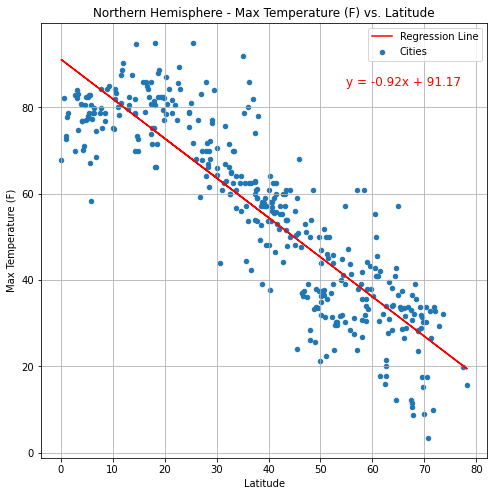

In [54]:
#Northern Hemisphere - Max Temperature (F) vs. Latitude
#Set up
x_values = northern_df['Lat']
y_values = northern_df['Temp F']

#find the regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
equation = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate a scatter plot
northern_df.plot(kind="scatter", y="Temp F", x="Lat", grid=True, figsize=(8,8),
                 title="Northern Hemisphere - Max Temperature (F) vs. Latitude", label = 'Cities')

#regression line
plt.plot(x_values,equation,"r-", label="Regression Line")
plt.annotate(line_eq,(55,85),fontsize=12,color="red")
#plt.title('Vs. ')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.legend()
plt.savefig('../output_data/North_Temp.png')
plt.show()

The linear regression line show that the maximum temperature is highest near 0 latitude for the cities in the Northern Hemisphere and decreases almost at a steady slope of -1 as it moves to the North pole.  This makes sense as the earth is curved and temperature will decrease as it moves away from the equator and towards the respective pole.

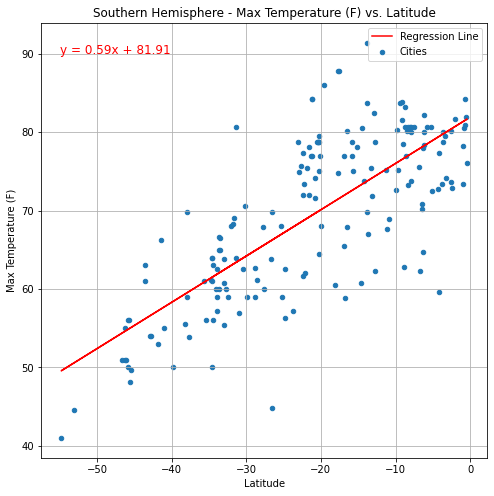

In [55]:
#Southern Hemisphere - Temperature (F) vs. Latitude
#Set up
x_values = southern_df['Lat']
y_values = southern_df['Temp F']

#find the regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
equation = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate a scatter plot
southern_df.plot(kind="scatter", y="Temp F", x="Lat", grid=True, figsize=(8,8),
                 title="Southern Hemisphere - Max Temperature (F) vs. Latitude", label = 'Cities')

#regression line
plt.plot(x_values,equation,"r-", label="Regression Line")
plt.annotate(line_eq,(-55,90),fontsize=12,color="red")
#plt.title('Vs. ')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.legend()
plt.savefig('../output_data/South_Temp.png')
plt.show()

The linear regression line show that the maximum temperature is lowest near -50 latitude for the cities in the Southern Hemisphere and increase at a steady slope of ~0.6.  The slope of this line is directed by the sample set of cities, if another set of cities is used there slope will change and perhaps be closer to a 1.  This makes sense as the earth is curved and temperature will decrease as it moves away from the equator and towards the respective pole.

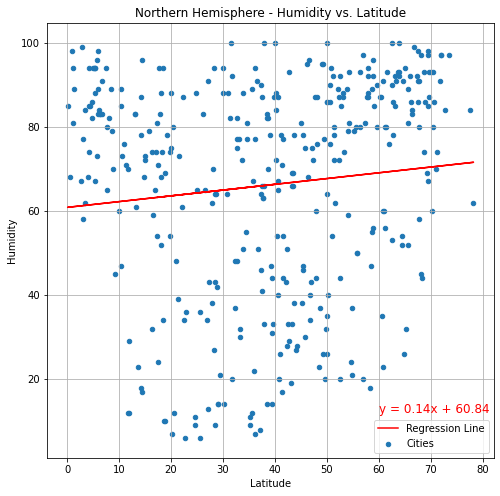

In [56]:
#Northern Hemisphere - Humidity vs. Latitude
#Set up
x_values = northern_df['Lat']
y_values = northern_df['Humidity']

#find the regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
equation = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate a scatter plot
northern_df.plot(kind="scatter", y="Humidity", x="Lat", grid=True, figsize=(8,8),
                 title="Northern Hemisphere - Humidity vs. Latitude", label = 'Cities')

#regression line
plt.plot(x_values,equation,"r-", label="Regression Line")
plt.annotate(line_eq,(60,12),fontsize=12,color="red")
#plt.title('Vs. ')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend()
plt.savefig('../output_data/North_Humid.png')
plt.show()

The above plot shows humidity in the northern hemisphere.  I don't think this has a pattern.  The regression line slopes slightly up with r=0.14 but this is probably attibuted to the random cities in the dataset, not a true relationship.

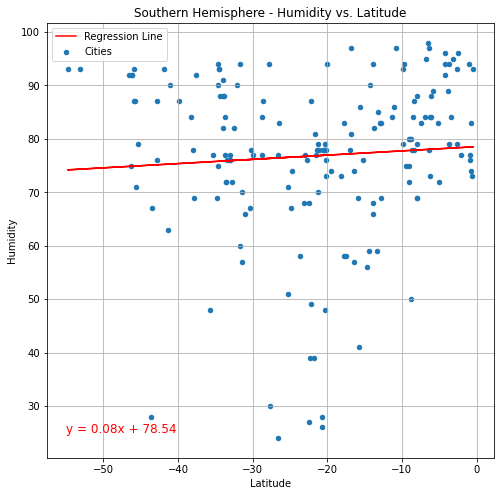

In [57]:
#Southern Hemisphere - Humidity vs. Latitude
#Set up
x_values = southern_df['Lat']
y_values = southern_df['Humidity']

#find the regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
equation = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate a scatter plot
southern_df.plot(kind="scatter", y="Humidity", x="Lat", grid=True, figsize=(8,8),
                 title="Southern Hemisphere - Humidity vs. Latitude", label = 'Cities')

#regression line
plt.plot(x_values,equation,"r-", label="Regression Line")
plt.annotate(line_eq,(-55,25),fontsize=12,color="red")
#plt.title('Vs. ')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend()
plt.savefig('../output_data/South_Humid.png')
plt.show()

The above plot shows humidity in the southern hemisphere.  I don't think this has a pattern.  The regression line slopes slightly up with r=0.08 but this is probably attibuted to the random cities in the dataset, not a true relationship.  The northern and southern plots both have r values that are positive, therefore a relationship cannot really be made for the equator and the poles.  Data not helpful to answer question "What's the weather like as we approach the equator?"

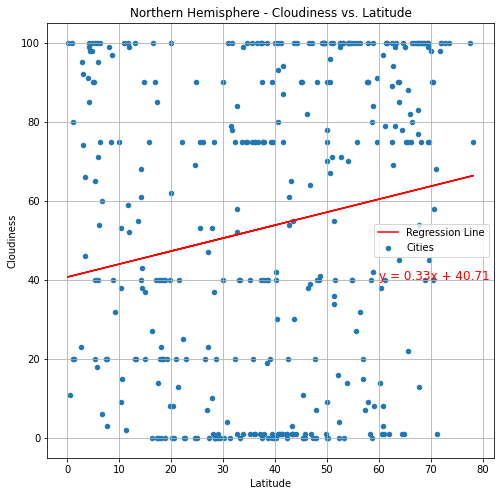

In [58]:
#Northern Hemisphere - Cloudiness vs. Latitude
#Set up
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']

#find the regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
equation = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate a scatter plot
northern_df.plot(kind="scatter", y="Cloudiness", x="Lat", grid=True, figsize=(8,8),
                 title="Northern Hemisphere - Cloudiness vs. Latitude", label = 'Cities')

#regression line
plt.plot(x_values,equation,"r-", label="Regression Line")
plt.annotate(line_eq,(60,40),fontsize=12,color="red")
#plt.title('Vs. ')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend()
plt.savefig('../output_data/North_Cloud.png')
plt.show()

The plot above shows northern cities latitude to cloudiness. This slope is r=0.33, which makes sense, as cities near the equator are usually more sunny than cities farther from the equator.  The latitudes close to 0 are more sunny that the cities that have a greater latitude.

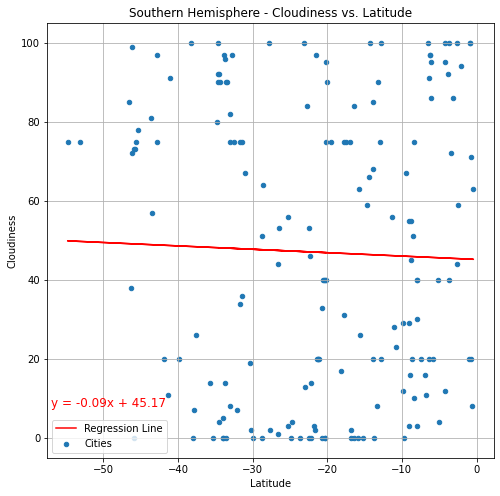

In [59]:
#Southern Hemisphere - Cloudiness vs. Latitude
#Set up
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']

#find the regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
equation = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate a scatter plot
southern_df.plot(kind="scatter", y="Cloudiness", x="Lat", grid=True, figsize=(8,8),
                 title="Southern Hemisphere - Cloudiness vs. Latitude", label = 'Cities')

#regression line
plt.plot(x_values,equation,"r-", label="Regression Line")
plt.annotate(line_eq,(-57,8),fontsize=12,color="red")
#plt.title('Vs. ')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend()
plt.savefig('../output_data/South_Cloud.png')
plt.show()

The plot above shows southern cities latitude to cloudiness. This slope is r=-0.09, which makes sense, as cities near the equator are usually more sunny than cities farther from the equator.  The latitudes close to 0 are more sunny that the cities that have a greater latitude.  The slope is not as drastic as the northern cities but the slope is negative, so the relationship represented makes sense.  A larger sample set could enhance both the northern and southern slopes, strengthening the hypothesis that cities toward the poles are more cloudy than cities near the equator.

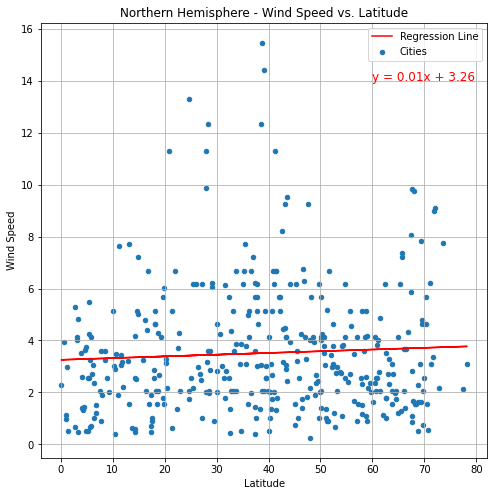

In [60]:
#Northern Hemisphere - Wind Speed vs. Latitude
#Set up
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']

#find the regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
equation = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate a scatter plot
northern_df.plot(kind="scatter", y="Wind Speed", x="Lat", grid=True, figsize=(8,8),
                 title="Northern Hemisphere - Wind Speed vs. Latitude", label = 'Cities')

#regression line
plt.plot(x_values,equation,"r-", label="Regression Line")
plt.annotate(line_eq,(60,14),fontsize=12,color="red")
#plt.title('Vs. ')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.legend()
plt.savefig('../output_data/North_Wind.png')
plt.show()

City wind speed to latitude, this is a very random plot.  There is no pattern, the regression line is flat nearly 0.

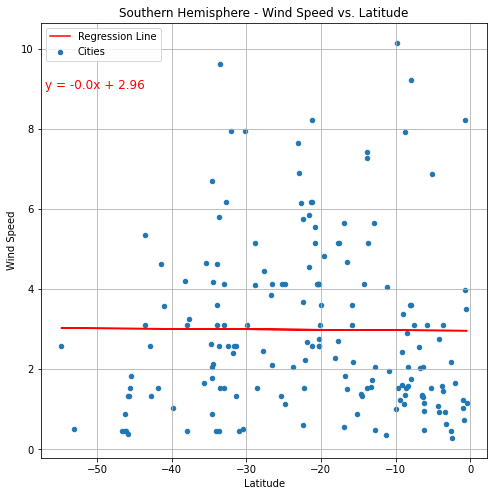

In [61]:
#Southern Hemisphere - Wind Speed vs. Latitude
#Set up
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']

#find the regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
equation = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate a scatter plot
southern_df.plot(kind="scatter", y="Wind Speed", x="Lat", grid=True, figsize=(8,8),
                 title="Southern Hemisphere - Wind Speed vs. Latitude", label = 'Cities')

#regression line
plt.plot(x_values,equation,"r-", label="Regression Line")
plt.annotate(line_eq,(-57,9),fontsize=12,color="red")
#plt.title('Vs. ')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.legend()
plt.savefig('../output_data/South_Wind.png')
plt.show()

City wind speed to latitude, this is a very random plot.  There is no pattern, the regression line is flat nearly 0.  The wind speed for northern and southern cities is almost the same, therefore no real relationship to the equator can be made.